
<font size="5">**Estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical conditions**</font>

<center>Redischool Dataanalytics final Projectc</center>

<center>by Qun Wang</center>



# Introduction
The dataset includes data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. 

The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

References
Palechor, F. M., & de la Hoz Manotas, A. (2019). Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico. Data in Brief, 104344.
Data resouce:https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+

# Data Exploration 


In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.metrics import r2_score
from IPython.display import display
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [100]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df.shape




(2111, 17)

In [101]:
df.isnull().sum()#check if there is null value

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [102]:
df=df.drop_duplicates()#check if there is duplicates and delete duplicates 
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [103]:
df.info()# show the information of each columns. 
#5 FAVC (Frequent consumption of high caloric food)
#6 FCVC (Frequency of Consumption of Vegetables)
#7 NCP  (Number of Main Meals)
#8 CAEC Consumption of food between meals
#10 CH20 (Consumption of Water Daily)
#11 SCC  (Calories consumption monitoring）
#12 FAF  (Physical Activity Frequency)
#13 TUE (Time Using Technology Devices)
#14 CALC (Consumption of alcohol)
#15 MTRANS(Transportation used)
#15 NObeyesdad (Obesity Types)
 





<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             20

In [104]:
df.describe()# show the statistics 


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [105]:
# replace obesity levels with abbreviations 
corrections = {'Insufficient_Weight':'IW', 'Normal_Weight':'NW', 'Overweight_Level_I':'OLI', 'Overweight_Level_II':'OLII', 'Obesity_Type_I':'OTI', 'Obesity_Type_II':'OTII', 'Obesity_Type_III':'OTIII'}
df['NObeyesdad'] = df['NObeyesdad'].replace(corrections)
df['NObeyesdad'].unique()

array(['NW', 'OLI', 'OLII', 'OTI', 'IW', 'OTII', 'OTIII'], dtype=object)

In [106]:
# check the amount of different obesity levels 
df['NObeyesdad'].value_counts()

OTI      351
OTIII    324
OTII     297
OLII     290
NW       282
OLI      276
IW       267
Name: NObeyesdad, dtype: int64

In [107]:
# Create a new Dataframe in order to present the numbers and obesity types 
df11= pd.DataFrame()
df11['Obesity types']=['OTI','OTIII','OTII','OLII','NW','OLI','IW']
df11['Count']=list(df['NObeyesdad'].value_counts())
df11

,Obesity types,Count
0,OTI,351
1,OTIII,324
2,OTII,297
3,OLII,290
4,NW,282
5,OLI,276
6,IW,267


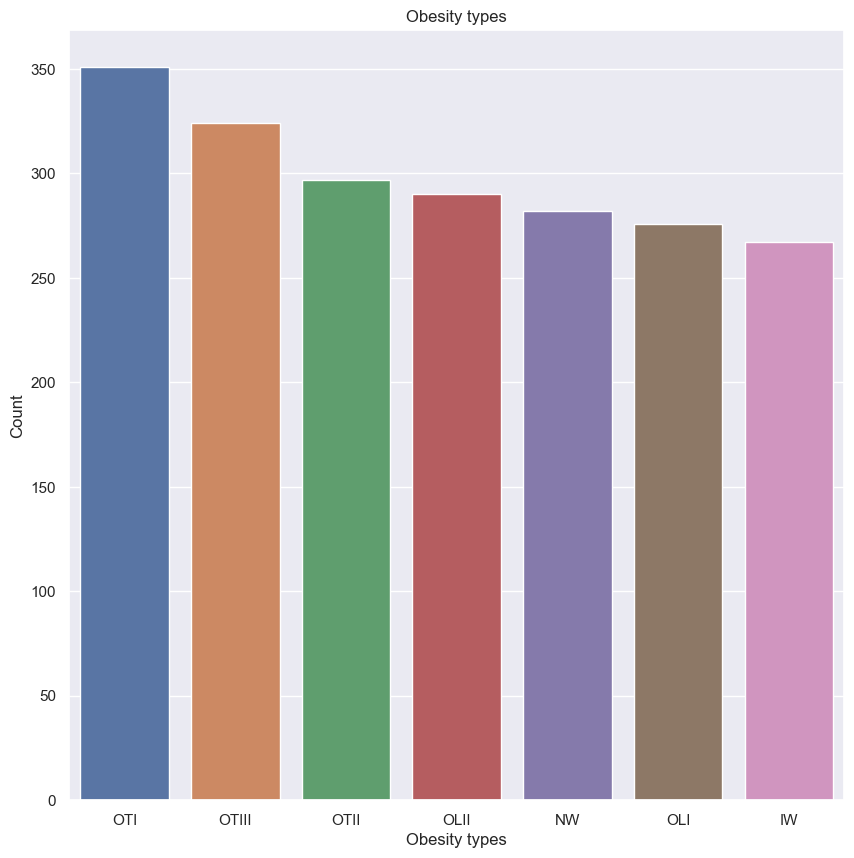

In [108]:
#visualizye the obesity types and amount
plt.title("Obesity types")
sns.barplot(x=df11["Obesity types"],y=df11['Count'])
sns.set(rc = {'figure.figsize':(10,8)})

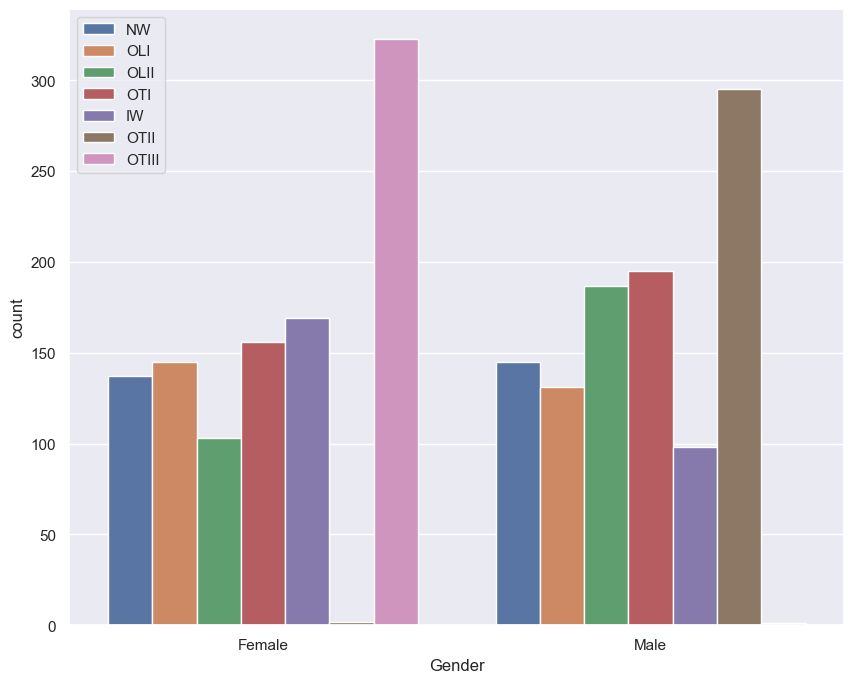

In [109]:
# Visualize the obesity levels with Genders 
sns.countplot(x="Gender", hue="NObeyesdad", data=df)
plt.legend(loc='upper left')

<AxesSubplot:xlabel='Age', ylabel='NObeyesdad'>

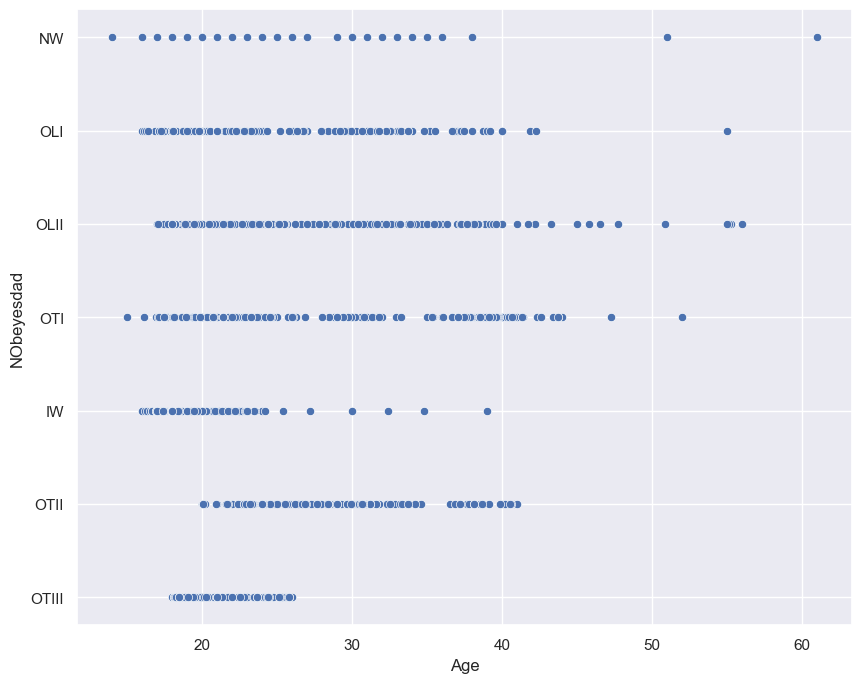

In [110]:
#Visualize obesity levels with ages
sns.scatterplot(data = df, x = "Age", y = "NObeyesdad") # Obesity type III (unter 30) and II also insufficient weight (under 40) only among younger people 

<AxesSubplot:xlabel='Height', ylabel='NObeyesdad'>

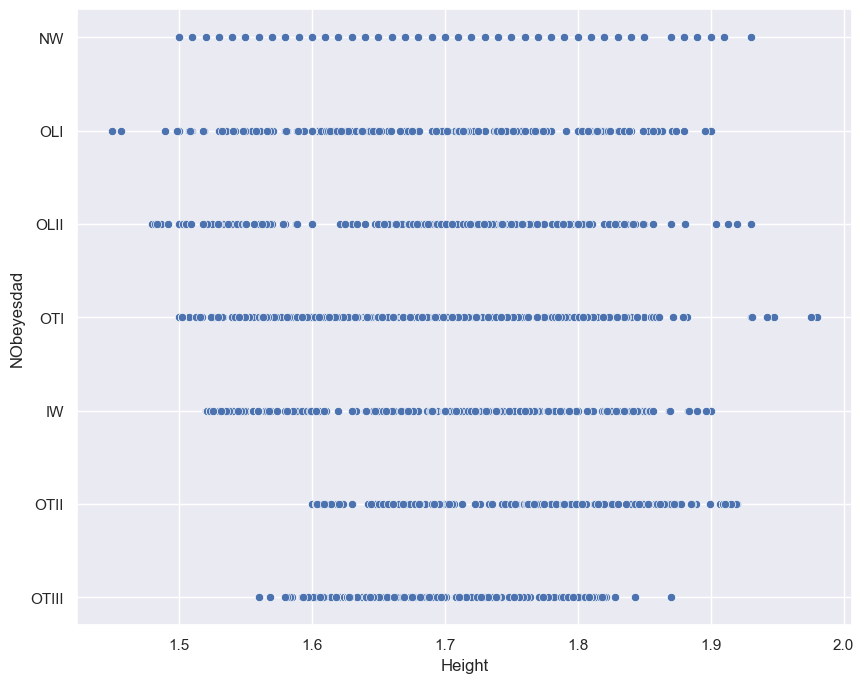

In [111]:
# visualiz obesity levels with heights
sns.scatterplot(data = df, x = "Height", y = "NObeyesdad")

<AxesSubplot:xlabel='Weight', ylabel='NObeyesdad'>

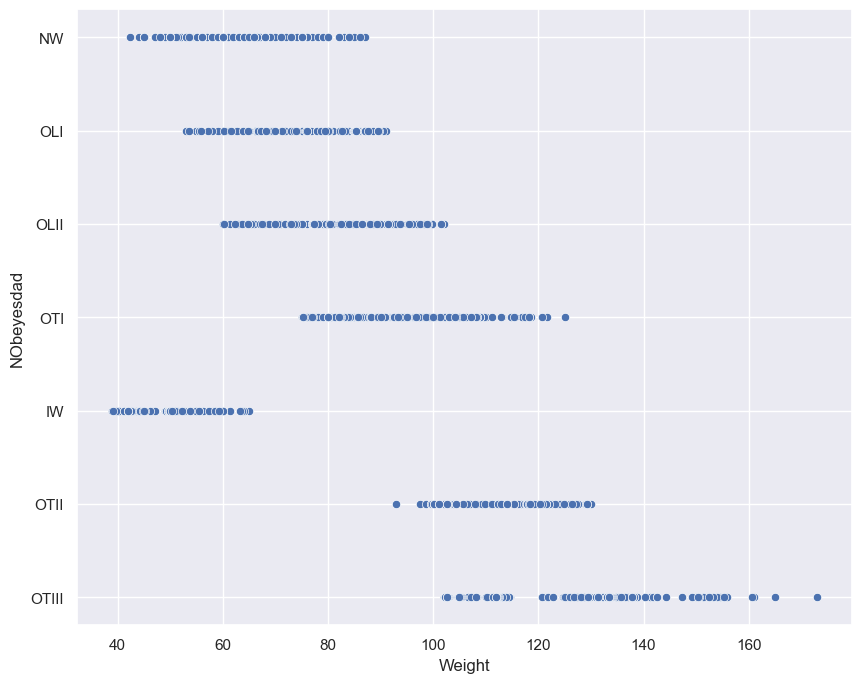

In [112]:
#visualize levels with weight
sns.scatterplot(data = df, x = "Weight", y = "NObeyesdad")

In [113]:
#check the number of diffferent obesity levels with family history 
df['family_history_with_overweight'].value_counts()

yes    1722
no      365
Name: family_history_with_overweight, dtype: int64

<AxesSubplot:xlabel='family_history_with_overweight', ylabel='count'>

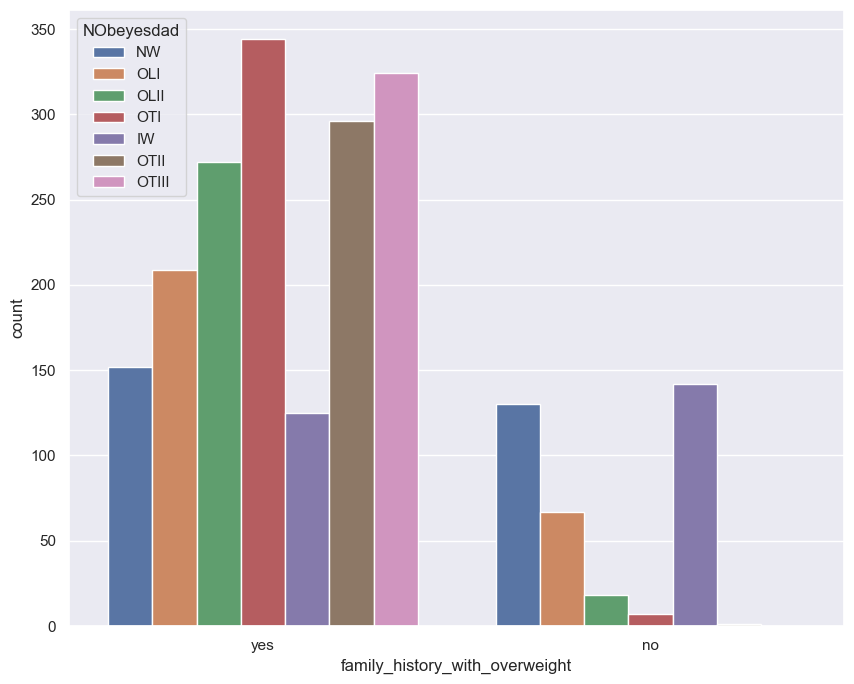

In [114]:
#visualize obesity levels with family history 
sns.countplot(x="family_history_with_overweight", hue="NObeyesdad", data=df)

In [115]:
#check the number of diffferent obesity levels with 'FAVC'
df['FAVC'].value_counts()# Frequent consumption of high caloric food

yes    1844
no      243
Name: FAVC, dtype: int64

<AxesSubplot:xlabel='FAVC', ylabel='count'>

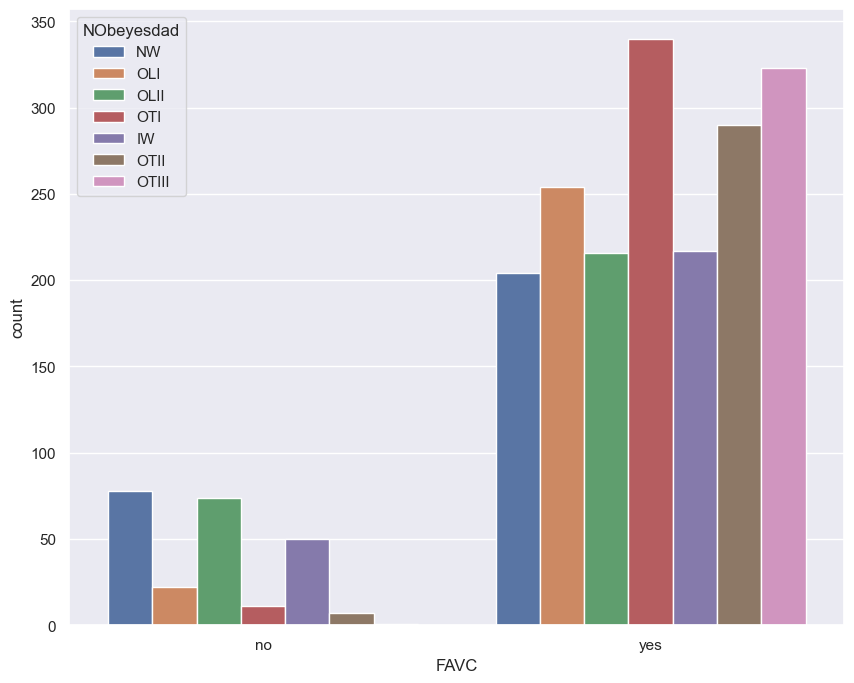

In [116]:
#visualize obesity levels with 'FAVC'
sns.countplot(x="FAVC", hue="NObeyesdad", data=df)

In [117]:
# round off the 'FCVC', because the origninal data is not integer 
df['FCVC']=df['FCVC'].round(decimals=0)#Frequency of Consumption of Vegetables


In [118]:
#check the number of diffferent obesity levels with 'FCVC'
df['FCVC'].value_counts()

2.0    994
3.0    991
1.0    102
Name: FCVC, dtype: int64

<AxesSubplot:xlabel='FCVC', ylabel='count'>

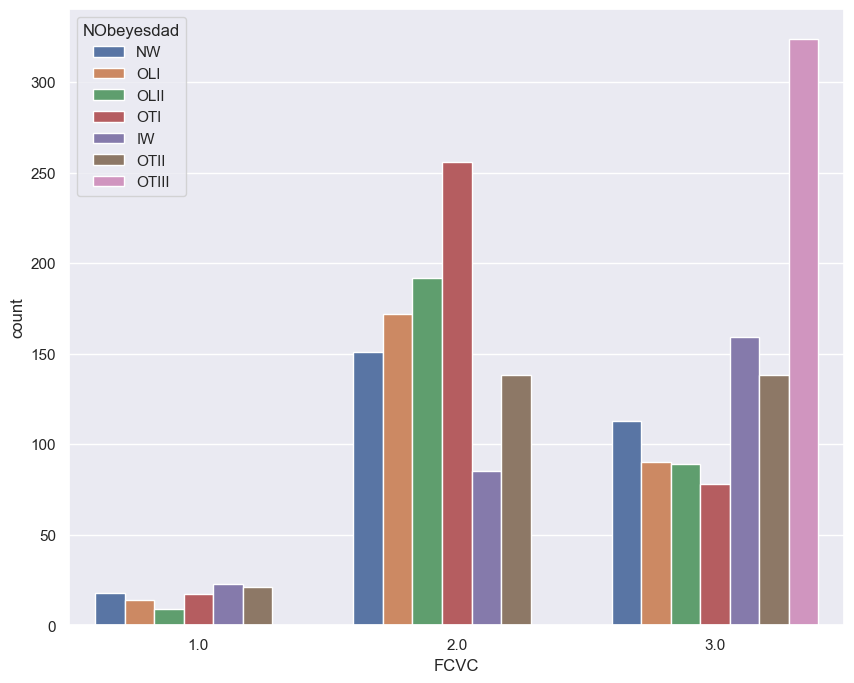

In [119]:
#visualize obesity levels with 'FCVC'
sns.countplot(x="FCVC", hue="NObeyesdad", data=df)

In [120]:
# round off the 'NCP', because the origninal data is not integer 
df['NCP']=df['NCP'].round(decimals=0)

In [121]:
#check the number of diffferent obesity levels with 'NCP'
df['NCP'].value_counts()#Number of Main Meals

3.0    1466
1.0     296
2.0     176
4.0     149
Name: NCP, dtype: int64

<AxesSubplot:xlabel='NCP', ylabel='count'>

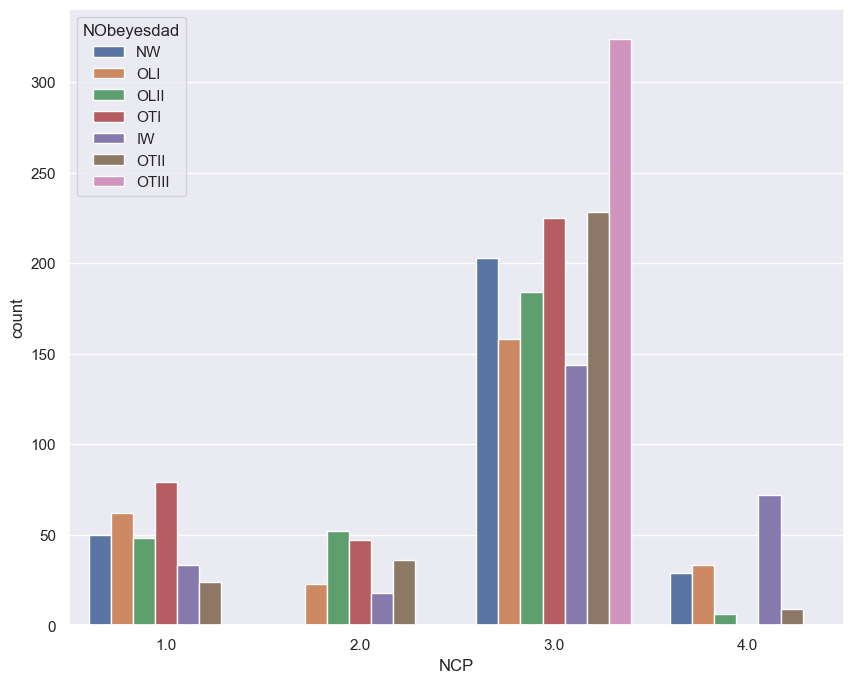

In [122]:
#visualize obesity levels with 'NCP'
sns.countplot(x="NCP", hue="NObeyesdad", data=df)

In [123]:
#check the number of diffferent obesity levels with 'CAEC'
df['CAEC'].value_counts()#Consumption of food between meals

Sometimes     1761
Frequently     236
Always          53
no              37
Name: CAEC, dtype: int64

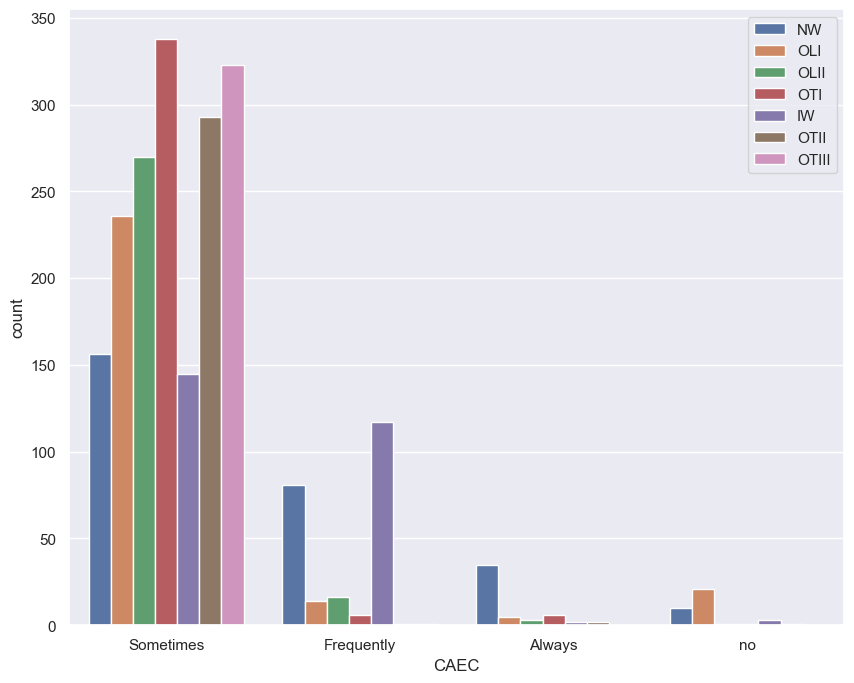

In [124]:
#visualize obesity levels with 'NCP'
sns.countplot(x="CAEC", hue="NObeyesdad", data=df)
plt.legend(loc='upper right')

In [125]:
#check the number of diffferent obesity levels with 'CAEC'
df['SMOKE'].value_counts()

no     2043
yes      44
Name: SMOKE, dtype: int64

<AxesSubplot:xlabel='SMOKE', ylabel='count'>

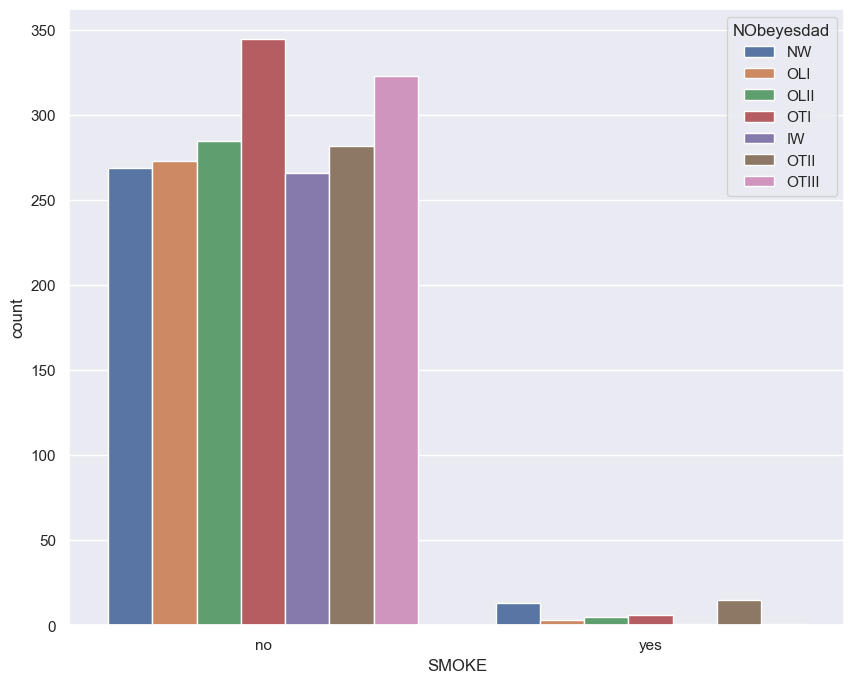

In [126]:
#visualize obesity levels with 'smoke'
sns.countplot(x="SMOKE", hue="NObeyesdad", data=df)

In [127]:
# round off the 'CH2O', because the origninal data is not integer 
df['CH2O']=df['CH2O'].round(decimals=0)#consumption of Water Daily

In [128]:
#check the number of diffferent obesity levels with 'CH2O'
df['CH2O'].value_counts()

2.0    1107
3.0     502
1.0     478
Name: CH2O, dtype: int64

<AxesSubplot:xlabel='CH2O', ylabel='count'>

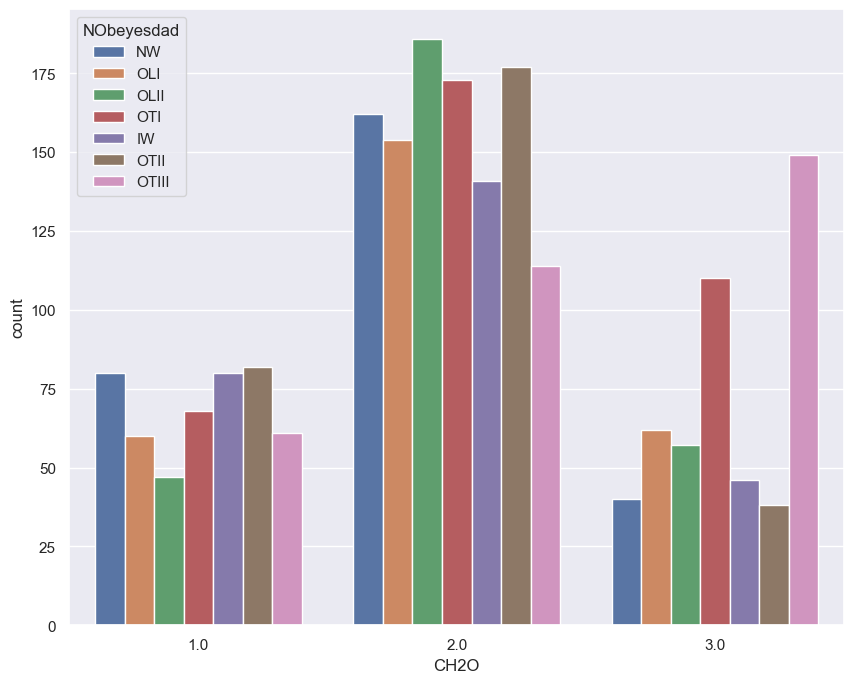

In [129]:
#visualize obesity levels with 'CH2O'
sns.countplot(x="CH2O", hue="NObeyesdad", data=df)

In [130]:
#check the number of diffferent obesity levels with 'SCC'
df['SCC'].value_counts()#Calories consumption monitoring

no     1991
yes      96
Name: SCC, dtype: int64

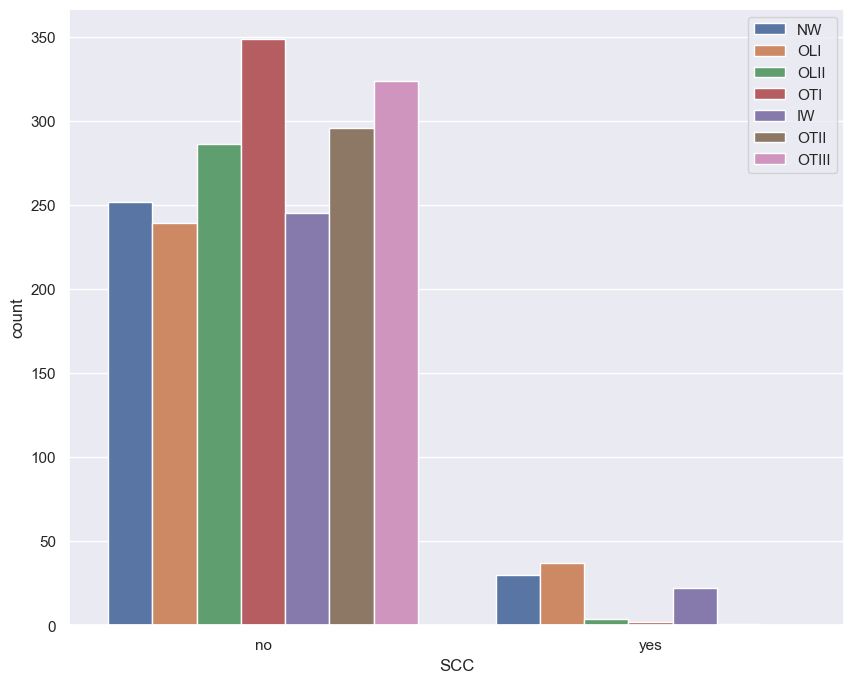

In [131]:
#visualize obesity levels with 'SCC'
sns.countplot(x="SCC", hue="NObeyesdad", data=df)
plt.legend(loc='upper right')

In [132]:
# round off the 'FAF', because the origninal data is not integer 
df['FAF']=df['FAF'].round(decimals=0)

In [133]:
#check the number of diffferent obesity levels with 'FAF'
df['FAF'].value_counts()

1.0    759
0.0    714
2.0    495
3.0    119
Name: FAF, dtype: int64

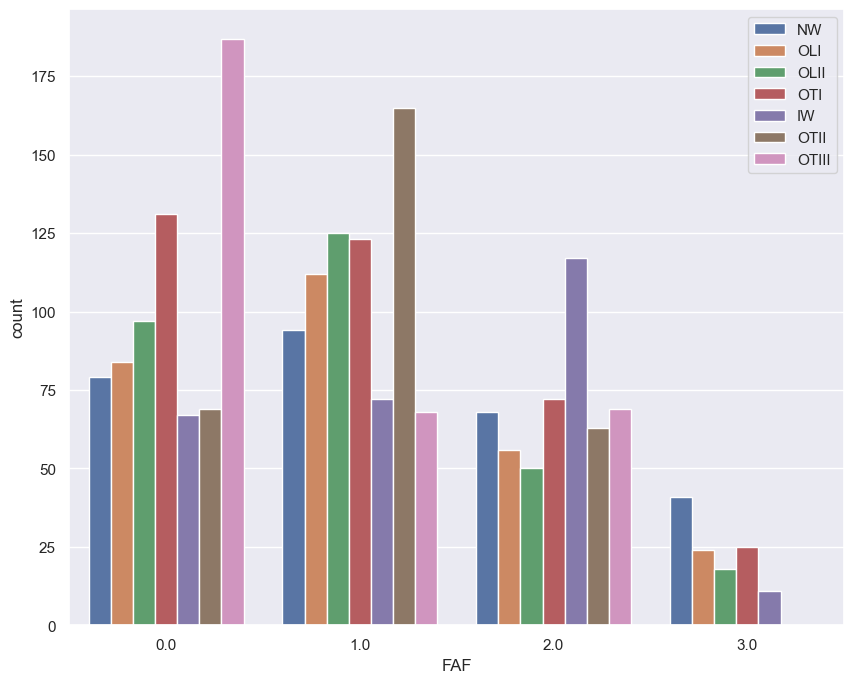

In [134]:
#visualize obesity levels with 'FAF'
sns.countplot(x="FAF", hue="NObeyesdad", data=df)#Physical Activity Frequency
plt.legend(loc='upper right')

In [135]:
# round off the 'TUE', because the origninal data is not integer 
df['TUE']=df['TUE'].round(decimals=0)

In [136]:
#check the number of diffferent obesity levels with 'TUE'
df['TUE'].value_counts()#Time Using Technology Devices

0.0    932
1.0    912
2.0    243
Name: TUE, dtype: int64

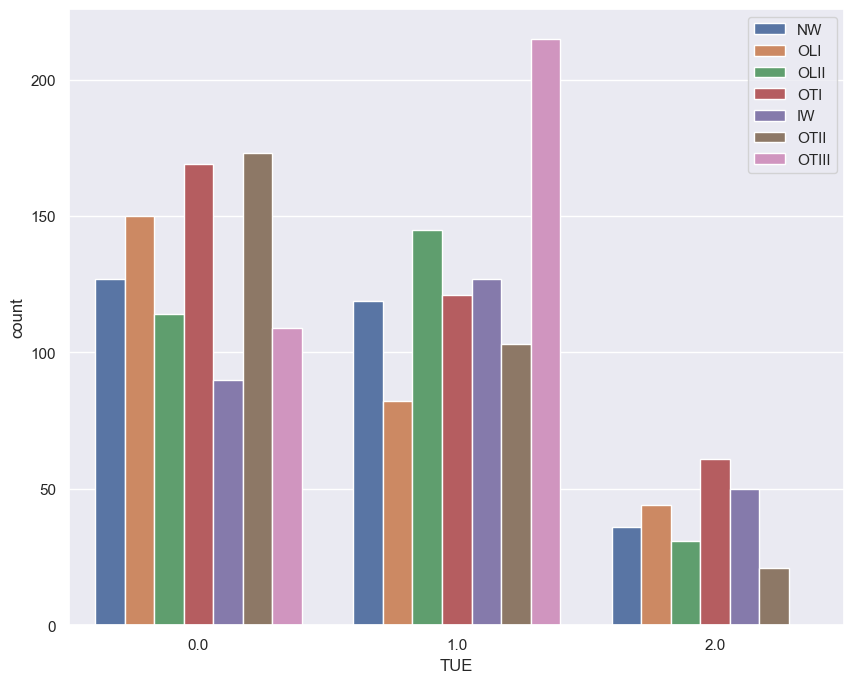

In [137]:
#visualize obesity levels with 'TUE'
sns.countplot(x="TUE", hue="NObeyesdad", data=df)
plt.legend(loc='upper right')

In [138]:
#check the number of diffferent obesity levels with 'TUE'
df['CALC'].value_counts()#consumption of alcohol

Sometimes     1380
no             636
Frequently      70
Always           1
Name: CALC, dtype: int64

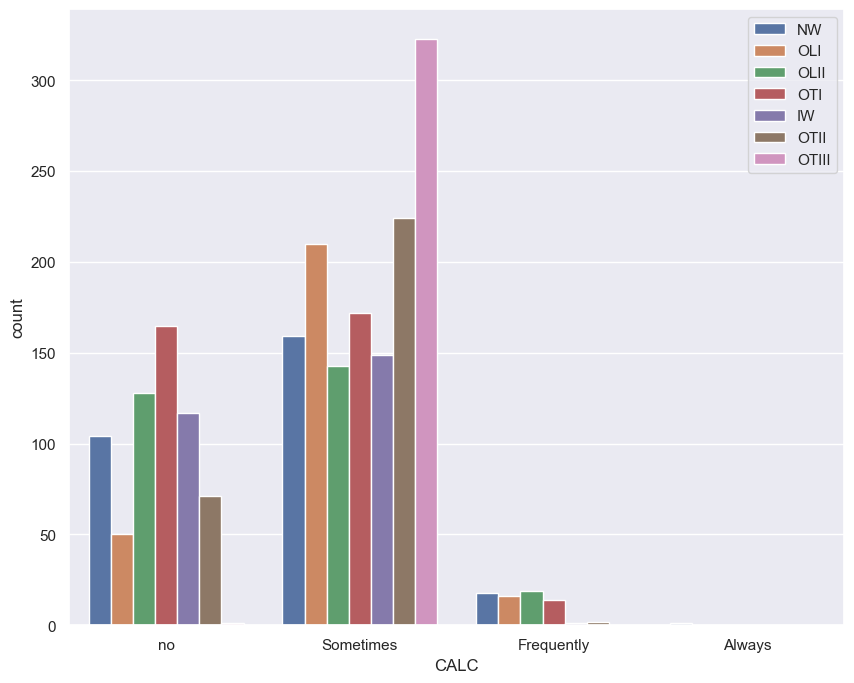

In [139]:
#visualize obesity levels with 'CALC'
sns.countplot(x="CALC", hue="NObeyesdad", data=df)
plt.legend(loc='upper right')

In [140]:
#check the number of diffferent obesity levels with 'MTRANS'
df['MTRANS'].value_counts()#Transportation used

Public_Transportation    1558
Automobile                456
Walking                    55
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64

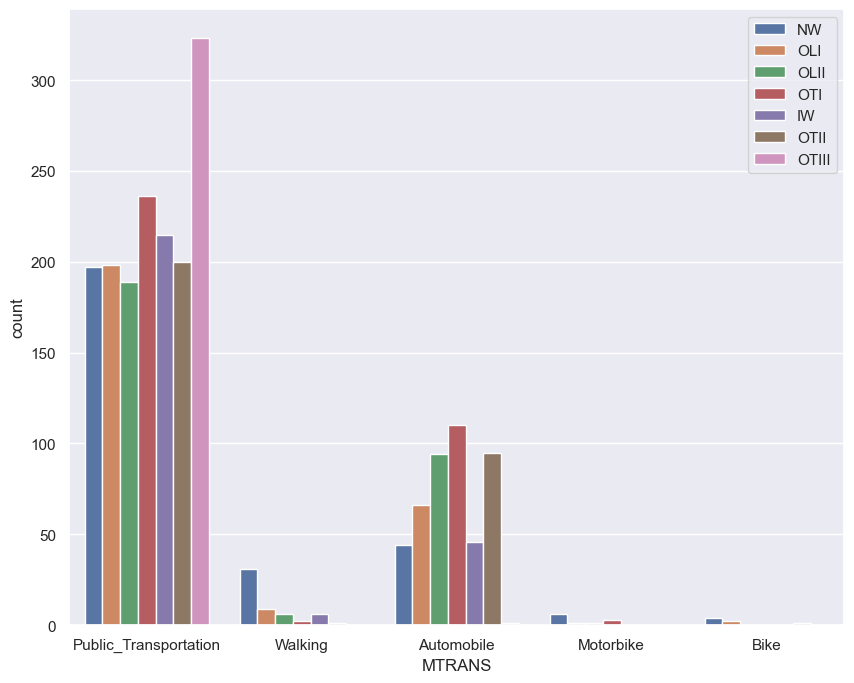

In [141]:
#visualize obesity levels with 'MTRANS'
sns.countplot(x="MTRANS", hue="NObeyesdad", data=df)
plt.legend(loc='upper right')


In [142]:
#show columns
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [143]:
#transform following ordinal data to numerical data 
corrections1= {'Male':1, 'Female':0}
df['Gender'] = df['Gender'].replace(corrections1)

In [144]:
corrections2= {'yes':1, 'no':0}
df['family_history_with_overweight'] = df['family_history_with_overweight'].replace(corrections2)

In [145]:
corrections3= {'no':1, 'Sometimes':2, 'Frequently': 3,'Always':4}
df['CAEC'] = df['CAEC'].replace(corrections3)

In [146]:
corrections4= {'yes':1, 'no':0}
df['SMOKE'] = df['SMOKE'].replace(corrections4)

In [147]:
corrections5= {'yes':1, 'no':0}
df['FAVC'] = df['FAVC'].replace(corrections5)

In [148]:
corrections6= {'yes':1, 'no':0}
df['SCC'] = df['SCC'].replace(corrections6)

In [149]:
corrections7= {'no':1, 'Sometimes':2, 'Frequently': 3,'Always':4}
df['CALC'] = df['CALC'].replace(corrections7)

In [150]:
corrections8= {'Public_Transportation':1, 'Automobile':2, 'Walking':3, 'Motorbike':4, 'Bike':5}
df['MTRANS'] = df['MTRANS'].replace(corrections8)

In [151]:
attributes=["Gender", "Age", "Height", "Weight", "family_history_with_overweight","FAVC", "FCVC", "NCP", "CAEC", "SMOKE","CH2O","SCC", "FAF", "TUE", "CALC","MTRANS","NObeyesdad"]

In [152]:

NObeyesdad_map = {'IW':1, 'NW':2, 'OLI':3, 'OLII':4, 'OTI':5, 'OTII':6, 'OTIII':7}
df['NObeyesdad'] = df['NObeyesdad'].map(NObeyesdad_map)

In [153]:
df1=df[df["NObeyesdad"]==1][["Gender", "Age", "Height", "Weight", "family_history_with_overweight","FAVC", "FCVC", "NCP", "CAEC", "SMOKE","CH2O","SCC", "FAF", "TUE", "CALC","MTRANS","NObeyesdad"]]
df1.shape
df2=df[df["NObeyesdad"]==2][["Gender", "Age", "Height", "Weight", "family_history_with_overweight","FAVC", "FCVC", "NCP", "CAEC", "SMOKE","CH2O","SCC", "FAF", "TUE", "CALC","MTRANS","NObeyesdad"]]
df2.shape
df3=df[df["NObeyesdad"]==3][["Gender", "Age", "Height", "Weight", "family_history_with_overweight","FAVC", "FCVC", "NCP", "CAEC", "SMOKE","CH2O","SCC", "FAF", "TUE", "CALC","MTRANS","NObeyesdad"]]
df3.shape
df4=df[df["NObeyesdad"]==4][["Gender", "Age", "Height", "Weight", "family_history_with_overweight","FAVC", "FCVC", "NCP", "CAEC", "SMOKE","CH2O","SCC", "FAF", "TUE", "CALC","MTRANS","NObeyesdad"]]
df4.shape
df5=df[df["NObeyesdad"]==5][["Gender", "Age", "Height", "Weight", "family_history_with_overweight","FAVC", "FCVC", "NCP", "CAEC", "SMOKE","CH2O","SCC", "FAF", "TUE", "CALC","MTRANS","NObeyesdad"]]
df5.shape
df6=df[df["NObeyesdad"]==6][["Gender", "Age", "Height", "Weight", "family_history_with_overweight","FAVC", "FCVC", "NCP", "CAEC", "SMOKE","CH2O","SCC", "FAF", "TUE", "CALC","MTRANS","NObeyesdad"]]
df6.shape
df7=df[df["NObeyesdad"]==7][["Gender", "Age", "Height", "Weight", "family_history_with_overweight","FAVC", "FCVC", "NCP", "CAEC", "SMOKE","CH2O","SCC", "FAF", "TUE", "CALC","MTRANS","NObeyesdad"]]
df7.shape




     


(324, 17)

In [154]:
# correltaion factors of all the parameters to the obesity levels 
for c in attributes:
    corr= np.corrcoef(df[c], df["NObeyesdad"])[0][1]
    print(c +": " , corr)


Gender:  -0.031919921680758946
Age:  0.2792305381751142
Height:  0.12486287925740679
Weight:  0.9124530170421005
family_history_with_overweight:  0.5033735794018178
FAVC:  0.24992663312265712
FCVC:  0.19613872455802975
NCP:  0.005712288760834162
CAEC:  -0.34220539017500456
SMOKE:  0.0019843306040487323
CH2O:  0.13908259814500265
SCC:  -0.1978191536642808
FAF:  -0.2029471518310146
TUE:  -0.08592477756230028
CALC:  0.1552995739401481
MTRANS:  -0.1267807282041076
NObeyesdad:  1.0


In [155]:
#df.drop(['MTRANS','SMOKE','CAEC','SCC'], axis=1, inplace=True)# delete columns which are not very relevant
df.drop(['Gender','MTRANS','SMOKE','NCP','TUE'], axis=1, inplace=True)

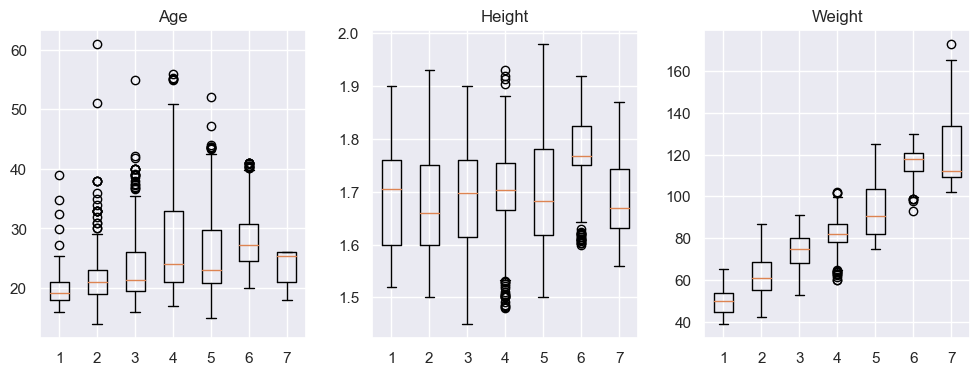

In [156]:
# boxplot age, height and weight for different obesity levels 
fig, axs = plt.subplots(1,3, figsize=(12,4))
attributesplt=["Age", "Height", "Weight"]
for j in range(3):
        k = j
        attr = attributesplt[k]
        ax = axs[j]
        ax.boxplot([df1[attr], df2[attr], df3[attr], df4[attr], df5[attr], df6[attr], df7[attr]])
        ax.set_title(attr)
        ax.set_xticklabels(['1', '2','3','4', '5','6','7'])
plt.subplots_adjust(wspace=.25, hspace=.25)       

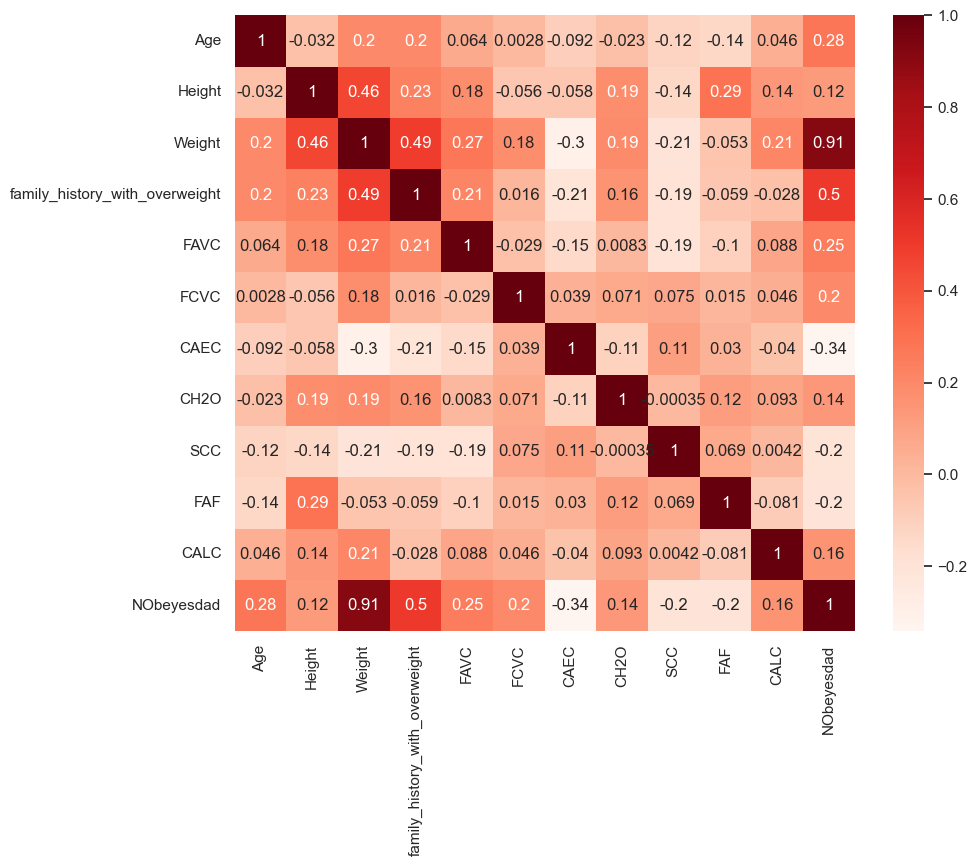

In [157]:
sns.heatmap(df.corr(), annot= True, cmap= 'Reds')
sns.set(rc = {'figure.figsize':(10,10)})

# Statistical Analysis

Test 1: Perform a t-test to examine a hypothesis that says: the average age of people with obesity is greater than 25 years, with a 99% confidence level.


In [158]:
X= df[df["NObeyesdad"]>2]["Age"]
print(len(X), X.mean())

alpha=0.01

tsat, pval= stats.ttest_1samp(a=X, popmean=24, alternative="greater")
print("P-value: ", pval)
print("t-statistic: ", tsat)

if pval <alpha:
    print("we reject the null hypothesis")
else:
    print("we fail to reject the null hypothesis")


1538 25.624094864759435
P-value:  3.258591862972028e-22
t-statistic:  9.769352673632287
we reject the null hypothesis


Test 2: Perform a t-test to examine the hypothesis that says: the average age for people of insufficient weight and people with obesity are different 

In [159]:

A=df[df["NObeyesdad"]<2]["Age"]
B=df[df["NObeyesdad"]>2]["Age"]
print(len(A), A.mean())
print(len(B), B.mean())

alpha=0.01

tsat, pval= stats.ttest_ind(a=A, b=B, alternative="two-sided")
print("P-value: ", pval)
print("t-statistic: ", tsat)

if pval<alpha:
    print("we reject the null hypothesis")
else:
    print("we fail to reject the null hypothesis")



     


267 19.7716872846442
1538 25.624094864759435
P-value:  6.956827152071336e-45
t-statistic:  -14.45341555936406
we reject the null hypothesis


Test 3: Perform a t-test to examine the hypothesis that says: the physical Activity Frequency is higher for people of insufficient weight than for people with obesity. 

In [160]:
C= df[df["NObeyesdad"]<2]["FAF"]
D= df[df["NObeyesdad"]>2]["FAF"]

print(len(C), C.mean())
print(len(D), D.mean())

alpha=0.01

tsat, pval= stats.ttest_ind(a=C, b=D, alternative="greater")
print("t-statistic: ", tsat)
print("P-value: ", pval)

if pval<alpha:
    print("we reject the null hypothesis")
else:
    print("we fail to reject the null hypothesis")


267 1.2696629213483146
1538 0.9193758127438232
t-statistic:  6.1181874680962105
P-value:  5.790412934186259e-10
we reject the null hypothesis


Test 4: Perform a t-test to examine the hypothesis that says: The frequent consumption of high caloric food is higher for people of insufficient weight than for people with obesity

In [161]:
E= df[df["NObeyesdad"]<2]["CAEC"]
F= df[df["NObeyesdad"]>2]["CAEC"]

print(len(E), E.mean())
print(len(F), F.mean())

alpha=0.01

tsat, pval= stats.ttest_ind(a=E, b=F, alternative="greater")
print("t-statistic: ", tsat)
print("P-value: ", pval)

if pval<alpha:
    print("we reject the null hypothesis")
else:
    print("we fail to reject the null hypothesis")


267 2.4419475655430714
1538 2.0299089726918074
t-statistic:  18.638094973578582
P-value:  2.4288997652113965e-71
we reject the null hypothesis


Test 5: Perform a chi-squared test to examine whether Obesity is dependent or independent from family_history_with_overweight. Use a 95% confidence level

In [162]:

df1=pd.crosstab(df["family_history_with_overweight"], df["NObeyesdad"])
df1


NObeyesdad,1,2,3,4,5,6,7
family_history_with_overweight,,,,,,,
0,142,130,67,18,7,1,0
1,125,152,209,272,344,296,324


In [163]:
chi2stat, pval, dof, expected= stats.chi2_contingency(df1)
print("chi2 stat: ", chi2stat)
print("P-value: ", pval)
print("degree of freedom: ", dof)
print("Expected values: \n", expected)

alpha=0.05

if pval<alpha:
    print("we reject the null hypothesis Ho (Categories are dependent)")
else:
    print("we fail to reject the null hypothesis (Categories are independent)")

chi2 stat:  617.7109928294773
P-value:  3.524156108703611e-130
degree of freedom:  6
Expected values: 
 [[ 46.69621466  49.31959751  48.27024437  50.71873503  61.3871586
   51.94298035  56.66506948]
 [220.30378534 232.68040249 227.72975563 239.28126497 289.6128414
  245.05701965 267.33493052]]
we reject the null hypothesis Ho (Categories are dependent)


Test 6: Perform a chi-squared test to examine whether Obesity is dependent or independent from alcohol consumption. Use a 95% confidence level

In [164]:

df2=pd.crosstab(df["CALC"], df["NObeyesdad"])
df2


NObeyesdad,1,2,3,4,5,6,7
CALC,,,,,,,
1,117,104,50,128,165,71,1
2,149,159,210,143,172,224,323
3,1,18,16,19,14,2,0
4,0,1,0,0,0,0,0


In [165]:
chi2stat, pval, dof, expected= stats.chi2_contingency(df2)
print("chi2 stat: ", chi2stat)
print("P-value: ", pval)
print("degree of freedom: ", dof)
print("Expected values: \n", expected)

alpha=0.05

if pval<alpha:
    print("we reject the null hypothesis Ho (Categories are dependent)")
else:
    print("we fail to reject the null hypothesis (Categories are independent)")


chi2 stat:  335.5649286015763
P-value:  2.22093967310428e-60
degree of freedom:  18
Expected values: 
 [[8.13665549e+01 8.59377096e+01 8.41092477e+01 8.83756588e+01
  1.06965022e+02 9.05088644e+01 9.87369430e+01]
 [1.76550072e+02 1.86468615e+02 1.82501198e+02 1.91758505e+02
  2.32093915e+02 1.96387159e+02 2.14240537e+02]
 [8.95543843e+00 9.45855295e+00 9.25730714e+00 9.72688069e+00
  1.17728797e+01 9.96166747e+00 1.08672736e+01]
 [1.27934835e-01 1.35122185e-01 1.32247245e-01 1.38955438e-01
  1.68183996e-01 1.42309535e-01 1.55246766e-01]]
we reject the null hypothesis Ho (Categories are dependent)


# Machine learning 

## Data transform

In [166]:
scaled_data= MinMaxScaler().fit_transform(df.drop("NObeyesdad", axis=1))

In [167]:
df1=pd.DataFrame(scaled_data, columns=df.columns[:-1])

In [168]:
df1.head()

,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,CAEC,CH2O,SCC,FAF,CALC
0,0.148936,0.320755,0.186567,1.0,0.0,0.5,0.333333,0.5,0.0,0.000000,0.000000
1,0.148936,0.132075,0.126866,1.0,0.0,1.0,0.333333,1.0,1.0,1.000000,0.333333
2,0.191489,0.660377,0.283582,1.0,0.0,0.5,0.333333,0.5,0.0,0.666667,0.666667
3,0.276596,0.660377,0.358209,0.0,0.0,1.0,0.333333,0.5,0.0,0.666667,0.666667
4,0.170213,0.622642,0.379104,0.0,0.0,0.5,0.333333,0.5,0.0,0.000000,0.333333


In [169]:
X= df1
y=df["NObeyesdad"]

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

## Machine learning 1: Logistic regression

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [172]:
model1= LogisticRegression(max_iter=1000)
model1.fit(X_train, y_train)
model1.score(X_train, y_train)

0.6962252846015579

In [173]:
l_pred=model1.predict(X_test)

In [174]:
print(classification_report(y_test, l_pred))

              precision    recall  f1-score   support

           1       0.77      0.75      0.76        65
           2       0.53      0.35      0.42        55
           3       0.51      0.51      0.51        57
           4       0.59      0.46      0.52        63
           5       0.58      0.82      0.68        62
           6       0.83      0.75      0.79        57
           7       0.82      1.00      0.90        59

    accuracy                           0.67       418
   macro avg       0.66      0.66      0.65       418
weighted avg       0.66      0.67      0.66       418



## Machine learning 2: Decision Tree

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [176]:
model2=DecisionTreeClassifier()
model2.fit(X_train, y_train)
model2.score(X_train, y_train)

1.0

In [177]:
d_pred= model2.predict(X_test)

In [178]:
print(classification_report(y_test, d_pred))

              precision    recall  f1-score   support

           1       0.98      0.95      0.97        65
           2       0.82      0.93      0.87        55
           3       0.90      0.81      0.85        57
           4       0.92      0.90      0.91        63
           5       0.94      0.97      0.95        62
           6       1.00      0.98      0.99        57
           7       0.98      1.00      0.99        59

    accuracy                           0.94       418
   macro avg       0.94      0.93      0.93       418
weighted avg       0.94      0.94      0.94       418



## Machine learning 3: random forest 

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [180]:
model3=RandomForestClassifier(n_estimators=100, max_depth=10)

In [181]:
model3.fit(X_train, y_train)
model3.score(X_train, y_train)

0.9934092270820851

In [182]:
f_pred=model3.predict(X_test)

In [183]:
print(classification_report(y_test, f_pred))

              precision    recall  f1-score   support

           1       0.98      0.94      0.96        65
           2       0.78      0.82      0.80        55
           3       0.81      0.82      0.82        57
           4       0.85      0.89      0.87        63
           5       0.98      0.94      0.96        62
           6       1.00      0.98      0.99        57
           7       1.00      1.00      1.00        59

    accuracy                           0.91       418
   macro avg       0.91      0.91      0.91       418
weighted avg       0.92      0.91      0.91       418



## Support vector machine

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
model4=SVC()
model4.fit(X_train, y_train)
model4.score(X_train, y_train)

0.8496105452366687

In [185]:
s_pred=model4.predict(X_test)
print(classification_report(y_test, s_pred))

              precision    recall  f1-score   support

           1       0.86      0.77      0.81        65
           2       0.59      0.58      0.59        55
           3       0.56      0.77      0.65        57
           4       0.76      0.59      0.66        63
           5       0.89      0.89      0.89        62
           6       0.98      0.96      0.97        57
           7       0.97      1.00      0.98        59

    accuracy                           0.79       418
   macro avg       0.80      0.79      0.79       418
weighted avg       0.80      0.79      0.80       418



In [186]:
param_grid={"C":[1,10,100,100], "gamma":[0.1,0.01,0.001,0.0001]}

In [187]:
grid=GridSearchCV(SVC(), param_grid, verbose=2)

In [188]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=1, gamma=0.1; total time=   0.1s
[CV] END .....................................C=1, gamma=0.1; total time=   0.1s
[CV] END .....................................C=1, gamma=0.1; total time=   0.1s
[CV] END .....................................C=1, gamma=0.1; total time=   0.1s
[CV] END .....................................C=1, gamma=0.1; total time=   0.1s
[CV] END ....................................C=1, gamma=0.01; total time=   0.1s
[CV] END ....................................C=1, gamma=0.01; total time=   0.2s
[CV] END ....................................C=1, gamma=0.01; total time=   0.1s
[CV] END ....................................C=1, gamma=0.01; total time=   0.1s
[CV] END ....................................C=1, gamma=0.01; total time=   0.1s
[CV] END ...................................C=1, gamma=0.001; total time=   0.2s
[CV] END ...................................C=1,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 100],
                         'gamma': [0.1, 0.01, 0.001, 0.0001]},
             verbose=2)

In [189]:
grid.best_estimator_

SVC(C=100, gamma=0.1)

In [190]:
model4=SVC(C=100, gamma=0.001)
model4.fit(X_train, y_train)
s_pred=model4.predict(X_test)

In [191]:
print(classification_report(y_test, s_pred))

              precision    recall  f1-score   support

           1       0.76      0.65      0.70        65
           2       0.49      0.40      0.44        55
           3       0.42      0.25      0.31        57
           4       0.56      0.29      0.38        63
           5       0.39      0.84      0.53        62
           6       0.93      0.70      0.80        57
           7       0.79      1.00      0.88        59

    accuracy                           0.59       418
   macro avg       0.62      0.59      0.58       418
weighted avg       0.62      0.59      0.58       418



## aive-bayes

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [193]:
model6=GaussianNB()
model6.fit(X_train, y_train)
model6.score(X_train, y_train)

0.5877771120431396

In [194]:
g_pred=model6.predict(X_test)
print(classification_report(y_test, g_pred))

              precision    recall  f1-score   support

           1       0.69      0.77      0.73        65
           2       0.47      0.25      0.33        55
           3       0.52      0.21      0.30        57
           4       0.55      0.17      0.27        63
           5       0.35      0.73      0.47        62
           6       0.80      0.70      0.75        57
           7       0.62      1.00      0.77        59

    accuracy                           0.55       418
   macro avg       0.57      0.55      0.52       418
weighted avg       0.57      0.55      0.52       418



 # Conclusions 
 

 1.Factors affecting overall obesity level were identified, family_history_with_overweight ist more related obesity aside from weight
 2.Statistical Analysises were performed, to have a better understanding of the correlation 
 3.Several maschine learning models were trained,  Random forest did better than all others algorithms because it has better recall score than the rest